# Inverse Nataf transformation

Author: Dimitris G. Giovanis,
Date: June 25, 2018

Description:

In [ ]:
#Import necessary libraries
from UQpy.SampleMethods import MCS, Correlate, InvNataf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x = MCS(dimension=2, dist_name=['Normal', 'Normal'], dist_params=[[0, 1], [0, 1]], nsamples=1000)
# Define the non-Gaussian correlation matrix of the random variables
Rho_NG = np.array([[1.0, 0.9], [0.9, 1.0]])
print('Correlation matrix in the original space')
print(Rho_NG)

UQpy: Performing MCS design...
Done!
Correlation matrix in the original space
[[ 1.   0.9]
 [ 0.9  1. ]]


In [3]:
# Perform the inverse Nataf transformation
p = InvNataf(samples=x, corr=Rho_NG, marginal_name=['Uniform', 'Uniform'], marginal_params=[[1, 3], [0, 1]])
print('Correlation matrix in the standard normal space')
print(p.corr_norm)

Correlation matrix in the standard normal space
[[ 1.          0.91918929]
 [ 0.91918929  1.        ]]


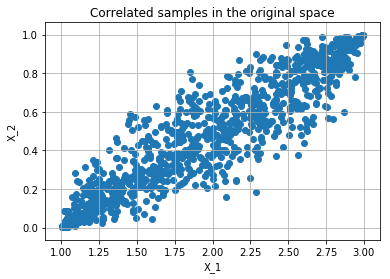

In [4]:
plt.figure()
plt.title('Correlated samples in the original space')
plt.scatter(p.samples_x[:, 0], p.samples_x[:, 1])
plt.grid(True)
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

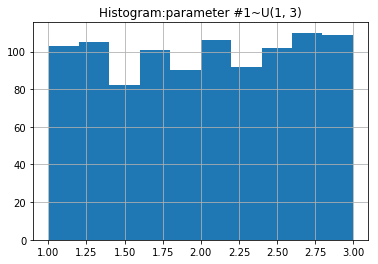

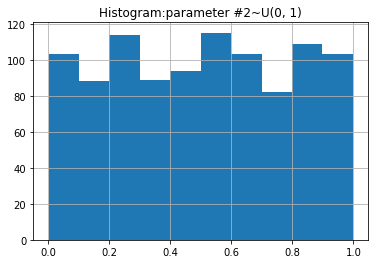

In [5]:
# Plot the distribution of the variables in the basic space
fig, ax = plt.subplots()
plt.title('Histogram:parameter #1~U(1, 3)')
plt.hist(p.samples_x[:, 0])
ax.yaxis.grid(True)
ax.xaxis.grid(True)

fig, ax = plt.subplots()
plt.title('Histogram:parameter #2~U(0, 1)')
plt.hist(p.samples_x[:, 1])
ax.yaxis.grid(True)
ax.xaxis.grid(True)
plt.show()